In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [3]:
#################################################################################

In [4]:
warnings.filterwarnings('ignore')

In [5]:
#################################################################################

In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
#################################################################################

In [8]:
df = pd.read_csv('golden_scent_perfumes3.csv')

In [9]:
#################################################################################

In [10]:
df

,الاسم,rating,total_ratings,img,السعر النهائي,Brand,Gender,Product Type,Character,Fragrance Family,...,Concentration,Top Notes,Middle Notes,Base Notes,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key
0,Korloff Cuir Mythique EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760251870322_-_korloff_-_korloff_cuir_mythique_edp_100_ml_-_100_ml_-_fd.png,1116.0,Korloff,Unisex,Perfume,Classical,Leather,...,Eau de Parfum,"Mandarin, Pine, Juniper","Ginger, Galbanum, Iris",Leather,NaN,NaN,NaN,NaN,NaN,NaN
1,Calvin Klein Euphoria Women,"<h4 data-v-de649438="""">4.8</h4>","<span data-v-de649438="""">500 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/c/a/calvin_klein_euphoria_eau_de_parfum_1.jpg,298.0,Calvin Klein,Women,Perfume,Extravagant,Fruity,...,Eau de Parfum,Pomegranate,"Lotus Blossom, Black Orchid","Amber, Wood",Perfume,"Pomegranate, Lotus Blossom, Black Orchid, Amber, Wood",NaN,NaN,NaN,NaN
2,Grasse Perfumes Oud The Palace EDP - 30 ml,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/9/4/94616-grasse-perfume-oud-the-palace-30-ml.png,159.0,Grasse Perfumes,Unisex,Perfume,Classical,Leather,...,Eau de Parfum,"Rose Oil, Bulgarian Rose",Cinnamon,"Leather, Sandalwood",NaN,NaN,NaN,NaN,NaN,NaN
3,Marco Serussi Harmony,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760168632174_marco_serussi_harmoni_edt_100_ml_1.jpg,333.0,Marco Serussi,Men,Perfume,Charismatic,Woody Oriental,...,Eau de Toilette,Black Pepper- Cardamom- Cumin,Nutmeg- Neroli- Melon.,Patchouli- Vetiver.,NaN,"Black Pepper, Cardamom, Cumin, Nutmeg, Neroli, Melon, Patchouli, Vetiver",NaN,NaN,NaN,NaN
4,Lorenzo Villoresi Uomo,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/g/o/golden_scent_perfume_lorenzo_villoresi_perfumes_uomo_for_unisex_eau_de_toilette_8028544100934.jpg,629.0,Lorenzo Villoresi Firenze,Men,Perfume,Extravagant,Aromatic,...,Eau de Toilette,"Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin","Neroli, Sage, Juniper, Clove, Pepper, Thyme","Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood",NaN,"Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin, Neroli, Sage, Juniper, Clove, Pepper, Thyme, Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood","Blue,Silver",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,Salvatore Ferragamo Tuscan Soul Convio,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/8/0/8034097955365_salvatore_ferragamo_tuscan_soul_convivio_edt_75_ml.jpg,754.0,Salvatore Ferragamo,Unisex,Perfume,Natural,Citrus,...,Eau de Toilette,"Grapefruit, Carrot Seed","Cypress, Jasmine Petals","Ambroxan, Cashmere",NaN,"carrot seeds, grapefruit, jasmine, cypress trees, Cashmere wood and amberoxan.",Multi,NaN,NaN,NaN
8140,Montale Day Dreams,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/g/o/golden_scent_perfume_montale_perfumes_day_dreams_for_unsex_eau_de_perfum_m0060211b.jpg,426.0,Montale,Unisex,Perfume,Extravagant,Floral,...,Eau de Parfum,"Orange Blossom, Jasmine, Mandarin","Neroli, Tiare, Sandalwood","Vanilla, Coconut",NaN,"Mandarin Orange, Orange Blossom, Neroli, Tiare Flower, Jasmine, Sandalwood, Vanilla, Coconut.","Blue,Gold",NaN,NaN,NaN
8141,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/c

In [11]:
#################################################################################

In [12]:
df.rename(columns = { 'الاسم' : 'Name', 'السعر النهائي' : 'Price' }, inplace = True)

In [13]:
#################################################################################

In [14]:
df = df[df['Product Type'] == 'Perfume']

In [15]:
#################################################################################

In [16]:
df['Gender'].fillna('No Information', inplace=True)

In [17]:
df['Character'].fillna('No Information', inplace=True)

In [18]:
df['Fragrance Family'].fillna('No Information', inplace=True)

In [19]:
df['Ingredients'].fillna('No Information', inplace=True)

In [20]:
df['Concentration'].fillna('No Information', inplace=True)

In [21]:
df['Top Notes'].fillna('-', inplace=True)

In [22]:
df['Middle Notes'].fillna('-', inplace=True)

In [23]:
df['Base Notes'].fillna('-', inplace=True)

In [24]:
#################################################################################

In [25]:
df[df['Ingredients'] == 'No Information']

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Concentration,Top Notes,Middle Notes,Base Notes,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key
0,Korloff Cuir Mythique EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760251870322_-_korloff_-_korloff_cuir_mythique_edp_100_ml_-_100_ml_-_fd.png,1116.0,Korloff,Unisex,Perfume,Classical,Leather,...,Eau de Parfum,"Mandarin, Pine, Juniper","Ginger, Galbanum, Iris",Leather,NaN,No Information,NaN,NaN,NaN,NaN
2,Grasse Perfumes Oud The Palace EDP - 30 ml,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/9/4/94616-grasse-perfume-oud-the-palace-30-ml.png,159.0,Grasse Perfumes,Unisex,Perfume,Classical,Leather,...,Eau de Parfum,"Rose Oil, Bulgarian Rose",Cinnamon,"Leather, Sandalwood",NaN,No Information,NaN,NaN,NaN,NaN
6,Epock Genar EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6281000756102_-_epock_-_epock_genar_for_men_eau_de_parfum_50ml_-_50_ml_-_fd_1_.png,185.0,Epock,Men,Perfume,Charismatic,Oriental,...,Eau de Parfum,"Lemon, Ginger, Grapefruit","Sweet Pineapple, Cardamom, Cinnamon","Vetiver, Labdanum, Oakmoss",NaN,No Information,NaN,NaN,NaN,NaN
8,Atelier Cologne Clementine California EDC,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/7/3700591230035_-_atelier_cologne_-_atelier_cologne_clementine_california_cologne_absolue_pure_perfume_unisex_eau_de_cologne_100ml_-_100_ml_-_fd.png,890.0,Atelier Cologne,Unisex,Perfume,Dynamic,Citrus,...,Eau de Cologne,"Juniper Berry, Mandarin, Clementine","Pepper, Star Anise, Basil","Sandalwood, Vetiver, Cypress",NaN,No Information,NaN,NaN,NaN,NaN
9,Guerlain Patchouli Paris EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/3/3346470148819_-_guerlain_-_guerlain_patchouli_paris_eau_de_parfum_100ml_-_100_ml_-_fd.png,2046.0,Guerlain,Unisex,Perfume,Natural,Woody,...,Eau de Parfum,Aldehydes,Iris,"Vanilla, Amber, Patchouli",NaN,No Information,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,Pierra Katra Robinson III EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/4/6432452223647-pierra-katra-robinson-iii-for-unisex-by-pierra-katra-eau-de-parfum---85ml.png,109.0,Pierra Katra,Unisex,Perfume,Charismatic,Oriental,...,Eau de Parfum,-,-,-,NaN,No Information,NaN,NaN,NaN,NaN
8136,Johan.B Elegant Gentlemen Phenomenal EDT,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3700134409157-geparlys-elegant-gentleman-phenomenal-for-men-85ml-edt.png,53.0,Johan.B,Men,Perfume,Sophisticated,Fruity,...,Eau de Parfum,"Bergamot, Mandarin, Cedarwood","Vetiver, Patchouli, Cedar","Apple, Musk, Moss, Dry amber",NaN,No Information,NaN,NaN,NaN,NaN
8137,Prada Les Infusions De Mimosa EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/8/4/8435137753307-prada-prada-les-infusions-de-mimosa-_w_-edp-100-ml.png,679.0,Prada,Women,Perfume,Sensual,Floral,...,Eau de Parfum,"Anise, Tangerine","Mimosa, Rose",Woody Notes,NaN,No Information,NaN,NaN,NaN,NaN
8138,Orientica Luxury Collection Oud Saffron EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/629110

In [26]:
#################################################################################

In [27]:
gender = {}

In [28]:
counter = 1

In [29]:
for b in df.groupby(by = 'Gender').size().index:
    if b == 'No Information':
            gender['No Information'] = 0
    else:
        gender[b] = counter
        counter = counter + 1

In [30]:
gender = dict(sorted(gender.items(), key=lambda x:x[1]))

In [31]:
for first_key, first_item in gender.items():
        df.loc[df['Gender'] == first_key, 'Gender'] = first_item

In [32]:
df = df.astype({ 'Gender' : 'int64' })

In [33]:
#################################################################################

In [34]:
character = {}

In [35]:
counter = 1

In [36]:
for b in df.groupby(by = 'Character').size().index:
    if b == 'No Information':
            character['No Information'] = 0
    else:
        character[b] = counter
        counter = counter + 1

In [37]:
character = dict(sorted(character.items(), key=lambda x:x[1]))

In [38]:
for first_key, first_item in character.items():
        df.loc[df['Character'] == first_key, 'Character'] = first_item

In [39]:
df = df.astype({ 'Character' : 'int64' })

In [40]:
#################################################################################

In [41]:
family = {}

In [42]:
counter = 1

In [43]:
for b in df.groupby(by = 'Fragrance Family').size().index:
    if b == 'No Information':
            family['No Information'] = 0
    else:
        family[b] = counter
        counter = counter + 1

In [44]:
family = dict(sorted(family.items(), key=lambda x:x[1]))

In [45]:
for first_key, first_item in family.items():
        df.loc[df['Fragrance Family'] == first_key, 'Fragrance Family'] = first_item

In [46]:
df = df.astype({ 'Fragrance Family' : 'int64' })

In [47]:
#################################################################################

In [48]:
concentration = {}

In [49]:
counter = 1

In [50]:
for b in df.groupby(by = 'Concentration').size().index:
    if b == 'No Information':
            concentration['No Information'] = 0
    else:
        concentration[b] = counter
        counter = counter + 1

In [51]:
concentration = dict(sorted(concentration.items(), key=lambda x:x[1]))

In [52]:
for first_key, first_item in concentration.items():
        df.loc[df['Concentration'] == first_key, 'Concentration'] = first_item

In [53]:
df = df.astype({ 'Concentration' : 'int64' })

In [54]:
#################################################################################

In [55]:
df.isnull().sum()

Name                   0
rating                 0
total_ratings          0
img                    1
Price                  0
Brand                  8
Gender                 0
Product Type           0
Character              0
Fragrance Family       0
Size                  18
Year of Launch      3511
Concentration          0
Top Notes              0
Middle Notes           0
Base Notes             0
Category            7769
Ingredients            0
Product Color       7297
Preferences         8110
Makeup Type         8133
Search Key          8138
dtype: int64

In [56]:
#################################################################################

In [57]:
df.head(4)

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Concentration,Top Notes,Middle Notes,Base Notes,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key
0,Korloff Cuir Mythique EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760251870322_-_korloff_-_korloff_cuir_mythique_edp_100_ml_-_100_ml_-_fd.png,1116.0,Korloff,3,Perfume,6,27,...,3,"Mandarin, Pine, Juniper","Ginger, Galbanum, Iris",Leather,NaN,No Information,NaN,NaN,NaN,NaN
1,Calvin Klein Euphoria Women,"<h4 data-v-de649438="""">4.8</h4>","<span data-v-de649438="""">500 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/c/a/calvin_klein_euphoria_eau_de_parfum_1.jpg,298.0,Calvin Klein,4,Perfume,8,20,...,3,Pomegranate,"Lotus Blossom, Black Orchid","Amber, Wood",Perfume,"Pomegranate, Lotus Blossom, Black Orchid, Amber, Wood",NaN,NaN,NaN,NaN
2,Grasse Perfumes Oud The Palace EDP - 30 ml,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/9/4/94616-grasse-perfume-oud-the-palace-30-ml.png,159.0,Grasse Perfumes,3,Perfume,6,27,...,3,"Rose Oil, Bulgarian Rose",Cinnamon,"Leather, Sandalwood",NaN,No Information,NaN,NaN,NaN,NaN
3,Marco Serussi Harmony,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760168632174_marco_serussi_harmoni_edt_100_ml_1.jpg,333.0,Marco Serussi,2,Perfume,5,36,...,6,Black Pepper- Cardamom- Cumin,Nutmeg- Neroli- Melon.,Patchouli- Vetiver.,NaN,"Black Pepper, Cardamom, Cumin, Nutmeg, Neroli, Melon, Patchouli, Vetiver",NaN,NaN,NaN,NaN


In [58]:
#################################################################################

In [59]:
df[['Top Notes', 'Middle Notes', 'Base Notes']]

,Top Notes,Middle Notes,Base Notes
0,"Mandarin, Pine, Juniper","Ginger, Galbanum, Iris",Leather
1,Pomegranate,"Lotus Blossom, Black Orchid","Amber, Wood"
2,"Rose Oil, Bulgarian Rose",Cinnamon,"Leather, Sandalwood"
3,Black Pepper- Cardamom- Cumin,Nutmeg- Neroli- Melon.,Patchouli- Vetiver.
4,"Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin","Neroli, Sage, Juniper, Clove, Pepper, Thyme","Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood"
...,...,...,...
8139,"Grapefruit, Carrot Seed","Cypress, Jasmine Petals","Ambroxan, Cashmere"
8140,"Orange Blossom, Jasmine, Mandarin","Neroli, Tiare, Sandalwood","Vanilla, Coconut"
8141,-,-,-
8142,-,-,-


In [60]:
#################################################################################

In [61]:
for i in df['Top Notes']:
    if ',' in i:
        print(i)

Mandarin, Pine, Juniper
Rose Oil, Bulgarian Rose
Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin
Bergamot, Mandarin, and Lemon
Lemon, Ginger, Grapefruit
Juniper Berry, Mandarin, Clementine
Sicilian mandarin, white peach
Black Currant, Bergamot, Grapefruit
Black Currant, Bergamot, Lily
Ginger, Bergamot, Green Lemon
Bergamot, tangerine
Violet Leaves, Lemon, Cardamom
Pink Pepper, Cardamom, Saffron And Nutmeg
Saffron, Black Pepper, Clove Leaves
Black Pepper, Bergamot, Green Apple
Orange, Bergamot
Pink pepper, Mandarin orange, Ginger, kumquat
Coconut Blossoms, Freesia, Lily Of The Valley
Gardenia, Jasmine
Lemon, Sugar, Turkish Rose, Bulgarian Rose
Watermelon, Green apple, Raspberry, Peony
Pear juice, orange
Bergamot, Lemon, Orange
Mandarin, Bergamot, Lemon, Exotic Fruits
Green Notes, Bergamot, Neroli
Citrus fruits, lemon verbena, grapefruit, mandarin, lavender
Lavandin, Cardamom, Saffron
Neroli, Bergamot, Lemon, Sweet Orange, Jasmine
Red fruits, Orange, Rhubarb

In [62]:
for i in df['Middle Notes']:
    if ',' in i:
        print(i)

Ginger, Galbanum, Iris
Lotus Blossom, Black Orchid
Neroli, Sage, Juniper, Clove, Pepper, Thyme
Neroli, Pink Peppercorn, and Peony
Sweet Pineapple, Cardamom, Cinnamon
Pepper, Star Anise, Basil
jasmine, ylang-ylang
Cardamom, Citron, Cinnamon, Ginger
Ylang-ylang, Jasmine, Gardenia
Ylang-ylang, Jasmine
Violet, jasmine
Coffee, Geranium, Ambrox
Turkish Rose Absolute, Geranium, Oud
Freesia, Jasmine, Jasmine Sambac
Roses, Jasmine
Geranium, Rosemary, Lavender
Woods, Jasmine
Lokum, White Musk
Coconut, Rose
Orange, gardenia, cactus flowers
Pomegranate, Grapes, Apricot, Fig
Orange Flower, Jasmine, Neroli, White Tea
Honeysuckle, Rose
Ylang-Ylang, Lily-of-the-Valley, Rose, Narcissus, Iris
Ginger, nutmeg, cedar
Water Lily, Purple, Orange Blossoms
Rose, Geranium, Orange Blossom
Ylang-ylang, Rose, Osmanthus
Jasmine, Rose
Jasmine sambac, orange Blossom
Saffron, Tonka Bean
Sandalwood, patchouli, iris root, jasmine, cedarwood, tobacco, rose
Geranium, Cinnamon, Saffron, Blond Tobacco, Quince
Carnation, Ros

In [63]:
for i in df['Base Notes']:
    if ',' in i:
        print(i)

Amber, Wood
Leather, Sandalwood
Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood
Patchouli Heart, Vetiver Heart, and Cedar wood Oil'
Vetiver, Labdanum, Oakmoss
Sandalwood, Vetiver, Cypress
Vanilla, Amber, Patchouli
Cedar, Benzoin
Vetiver, Patchouli, Pink Pepper
Amber, Musk, Patchouli.
Sandalwood, Musk
Amber, Vetiver, Tonka Bean
Leather, Honey, Vetiver, Guaiac Wood, Patchouli
Guaiac wood, patchouli, cardamom
Cashmere Wood, White Cedarwood, White Musk
oud, patchouli, leather, styrax and incense.
Leather, Amber, Patchouli, Musk, Vanilla, Sandalwood
Patchouli, Woody Notes, Vanilla
White Musk, Vetiver, Vanilla, Patchouli
Patchouli, Petrol, Vetiver
Patchouli, Sea Spray, Gourmand Notes
Cedar, Vanilla
Sandalwood, Cedar Oud, White Musk
Joshua Tree, Ambroxan
Vanilla, Musk, Amber
Luminous Musks, Cedarwood, Osmanthus, Ambrox
Leather, Oak Moss, Sandalwood, Vetiver
White musk, benzoin, amber, tonka bean
Vetiver, Iris
Oud, Sandalwood, Amber
Vanilla, Musk, Patchouli, Amber.
Leather, 

In [64]:
#################################################################################

In [65]:
for ind in df.index:
    row = str(df.loc[ind, ['Top Notes']][0])
    if ',' in row:
        row = row.split(',')
        df.at[ind, 'Top Notes'] = row
    elif not '-' in row :
        temp = []
        temp.append(row)
        row = temp
        df.at[ind, 'Top Notes'] = row
    elif ' - ' in row:
        row = row.split(' - ')
        df.at[ind, 'Top Notes'] = row
    elif '- ' in row:
        row = row.split('- ')
        df.at[ind, 'Top Notes'] = row
    elif '-' in row and len(row) > 1:
        temp = []
        temp.append(row.replace('-', ' '))
        row = temp
        df.at[ind, 'Top Notes'] = row

In [66]:
for ind in df.index:
    row = str(df.loc[ind, ['Middle Notes']][0])
    if ',' in row:
        row = row.split(',')
        df.at[ind, 'Middle Notes'] = row
    elif not '-' in row:
        temp = []
        temp.append(row)
        row = temp
        df.at[ind, 'Middle Notes'] = row
    elif ' - ' in row:
        row = row.split(' - ')
        df.at[ind, 'Middle Notes'] = row
    elif '- ' in row:
        row = row.split('- ')
        df.at[ind, 'Middle Notes'] = row
    elif '-' in row and len(row) > 1:
        temp = []
        temp.append(row.replace('-', ' '))
        row = temp
        df.at[ind, 'Middle Notes'] = row

In [67]:
for ind in df.index:
    row = str(df.loc[ind, ['Base Notes']][0])
    if ',' in row:
        row = row.split(',')
        df.at[ind, 'Base Notes'] = row
    elif not '-' in row:
        temp = []
        temp.append(row)
        row = temp
        df.at[ind, 'Base Notes'] = row
    elif ' - ' in row:
        row = row.split(' - ')
        df.at[ind, 'Base Notes'] = row
    elif '- ' in row:
        row = row.split('- ')
        df.at[ind, 'Base Notes'] = row
    elif '-' in row and len(row) > 1:
        temp = []
        temp.append(row.replace('-', ' '))
        row = temp
        df.at[ind, 'Base Notes'] = row

In [68]:
#################################################################################

In [69]:
for ind in df.index:
    row = str(df.loc[ind, ['Top Notes']][0])
    if not '[' in row and not row == '-':
        print(row)

In [70]:
for ind in df.index:
    row = str(df.loc[ind, ['Middle Notes']][0])
    if not '[' in row and not row == '-':
        print(row)

In [71]:
for ind in df.index:
    row = str(df.loc[ind, ['Base Notes']][0])
    if not '[' in row and not row == '-':
        print(row)

In [72]:
#################################################################################

In [73]:
for ind in df.index:
    ingredient = str(df.loc[ind, ['Ingredients']][0])
    top = str(df.loc[ind, ['Top Notes']][0])
    middle = str(df.loc[ind, ['Middle Notes']][0])
    base = str(df.loc[ind, ['Base Notes']][0])
    if ingredient == 'No Information' and not top == '-' and not middle == '-' and not base == '-':
        ingredient = eval(top) + eval(middle) + eval(base)
        x = []
        for i in ingredient:
            if '.' in i:
                i = i.replace('.', '')
            if not i == '':
                if i[0] == ' ':
                    i = i[1:]
            if not i == '':
                if i[-1] == ' ':
                    i = i[:-1]
                x.append(i)
        df.at[ind, 'Ingredients'] = x

In [74]:
#################################################################################

In [75]:
mask = df[df['Ingredients'] == 'No Information'].index

In [76]:
df.drop(mask , inplace=True)

In [77]:
df[df['Ingredients'] == 'No Information']

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Concentration,Top Notes,Middle Notes,Base Notes,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key


In [78]:
#################################################################################

In [79]:
for ind in df.index:
    ingredient = df.loc[ind, ['Ingredients']][0]
    if not type(ingredient) == list:
        if ',' in ingredient:
            ingredient = ingredient.split(',')
            df.at[ind, 'Ingredients'] = ingredient
        elif ' - ' in ingredient:
            ingredient = ingredient.split(' - ')
            df.at[ind, 'Ingredients'] = ingredient
        elif not '-' in ingredient and len(ingredient) > 1:
            temp = []
            temp.append(ingredient)
            ingredient = temp
            df.at[ind, 'Ingredients'] = ingredient

In [80]:
#################################################################################

In [81]:
i = []

In [82]:
for ind in df.index:
    ingredient = df.loc[ind, ['Ingredients']][0]
    if not type(ingredient) == list:
        i.append(ind)

In [83]:
df.drop(i , inplace=True)

In [84]:
#################################################################################

In [85]:
for ind in df.index:
    ingredient = df.loc[ind, ['Ingredients']][0]
    if not type(ingredient) == list:
        print(ind)

In [86]:
#################################################################################

In [87]:
df['Ingredients Number'] = 0

In [88]:
df['Top Notes Number'] = 0

In [89]:
df['Middle Notes Number'] = 0

In [90]:
df['Base Notes Number'] = 0

In [91]:
#################################################################################

In [92]:
df

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number
0,Korloff Cuir Mythique EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760251870322_-_korloff_-_korloff_cuir_mythique_edp_100_ml_-_100_ml_-_fd.png,1116.0,Korloff,3,Perfume,6,27,...,NaN,"[Mandarin, Pine, Juniper, Ginger, Galbanum, Iris, Leather]",NaN,NaN,NaN,NaN,0,0,0,0
1,Calvin Klein Euphoria Women,"<h4 data-v-de649438="""">4.8</h4>","<span data-v-de649438="""">500 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/c/a/calvin_klein_euphoria_eau_de_parfum_1.jpg,298.0,Calvin Klein,4,Perfume,8,20,...,Perfume,"[Pomegranate, Lotus Blossom, Black Orchid, Amber, Wood]",NaN,NaN,NaN,NaN,0,0,0,0
2,Grasse Perfumes Oud The Palace EDP - 30 ml,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/9/4/94616-grasse-perfume-oud-the-palace-30-ml.png,159.0,Grasse Perfumes,3,Perfume,6,27,...,NaN,"[Rose Oil, Bulgarian Rose, Cinnamon, Leather, Sandalwood]",NaN,NaN,NaN,NaN,0,0,0,0
3,Marco Serussi Harmony,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760168632174_marco_serussi_harmoni_edt_100_ml_1.jpg,333.0,Marco Serussi,2,Perfume,5,36,...,NaN,"[Black Pepper, Cardamom, Cumin, Nutmeg, Neroli, Melon, Patchouli, Vetiver]",NaN,NaN,NaN,NaN,0,0,0,0
4,Lorenzo Villoresi Uomo,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/g/o/golden_scent_perfume_lorenzo_villoresi_perfumes_uomo_for_unisex_eau_de_toilette_8028544100934.jpg,629.0,Lorenzo Villoresi Firenze,2,Perfume,8,4,...,NaN,"[Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin, Neroli, Sage, Juniper, Clove, Pepper, Thyme, Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood]","Blue,Silver",NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138,Orientica Luxury Collection Oud Saffron EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6291106811520-orientica-orientica-luxury-collection-oud-saffron-_u_-edp-80-ml.png,474.0,Orientica,3,Perfume,13,35,...,NaN,"[Vanilla, Saffron, Patchouli, Musk, Guaiac Wood, Agarwood]",NaN,NaN,NaN,NaN,0,0,0,0
8139,Salvatore Ferragamo Tuscan Soul Convio,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/8/0/8034097955365_salvatore_ferragamo_tuscan_soul_convivio_edt_75_ml.jpg,754.0,Salvatore Ferragamo,3,Perfume,13,8,...,NaN,"[carrot seeds, grapefruit, jasmine, cypress trees, Cashmere wood and amberoxan.]",Multi,NaN,NaN,NaN,0,0,0,0
8140,Montale Day Dreams,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/g/o/golden_scent_perfume_montale_perfumes_day_dreams_for_unsex_eau_de_perfum_m0060211b.jpg,426.0,Montale,3,Perfume,8,10,...,NaN,"[Mandarin Orange, Orange Blossom, Neroli, Tiare Flower, Jasmine, Sandalwood, Vanilla, Coconut.]","Blue,Gold",NaN,NaN,NaN,0,0,0,0
8141,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/0/3015285282093-shakespeare-perfume-shakespeare-lover_s-complain-edp-spray-100ml.png,569.0,Shakespeare Perfume,3,Perfume,8,4,...,NaN,"[Berry, Tonka Bean, Leather, Amber]",NaN,NaN,NaN,NaN,0,0,0,0


In [93]:
#################################################################################

In [94]:
def list_len(x):
    if type(x['Ingredients']) == list:
        return len(x['Ingredients'])
    return 0

In [95]:
df['Ingredients Number'] = df.apply(list_len, axis=1)

In [96]:
df[df['Ingredients Number'] == 0]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number


In [97]:
#################################################################################

In [98]:
def list_len(x):
    if type(x['Top Notes']) == list:
        return len(x['Top Notes'])
    return 0

In [99]:
df['Top Notes Number'] = df.apply(list_len, axis=1)

In [100]:
df[df['Top Notes Number'] == 0]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number
21,Jad Khaoukh Peach Rivers of China EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6281184005935-jad-jad-khaoukh-peach-rivers-of-china-edp.png,249.0,Jad,3,Perfume,8,20,...,NaN,[Peach],NaN,NaN,NaN,NaN,1,0,0,0
26,Datura Perfumes Magnolia EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/0/3079047654825_-_datura_perfumes_-_-_80_ml_-_fd.png,282.0,Datura Perfumes,3,Perfume,14,10,...,NaN,"[Iris, Jasmine]",NaN,NaN,NaN,NaN,2,0,0,0
34,Liquides Imaginaires Désert Suave EDP,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760303360108-liquides-imaginaires-liquides-imaginaires-les-eaux-imaginaires-d_sert-suave-50-ml.png,630.0,Liquides Imaginaires,3,Perfume,14,10,...,NaN,"[Rose, orange, cedar, cardamom, sesame, orange blossom, dates]",NaN,NaN,NaN,NaN,7,0,0,0
40,Oud Asalah Amber Giovanni Parfum,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6287040475645_-_oud_asalah_-_-_50_ml_-_fd.png,345.0,Oud Asalah,3,Perfume,5,30,...,NaN,"[Amber, Sandalwood, Cardamom]",NaN,NaN,NaN,NaN,3,0,0,0
41,Serai Mirage EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/628900661647_-_serai_-_-_100_ml_-_fd.png,198.0,Serai,3,Perfume,5,30,...,NaN,"[Musk, Vanilla, Amber, Orange Blossom.]",NaN,NaN,NaN,NaN,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,Hermes Eau de citron noir EDC,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/3/3346132004903-hermes-hermes-eau-de-citron-noir-_u_-edc-100-ml-1.jpg,605.0,Hermes,3,Perfume,13,35,...,NaN,"[Lemon, Smoke, Lime, Citron, Guaiac Wood, Black Tea]",NaN,NaN,NaN,NaN,6,0,0,0
8128,Perfume Legend Tfasil EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/1/0/10220366_-_perfume_legend_-_-_80ml.png,285.0,Perfume Legend,3,Perfume,15,10,...,NaN,"[Gardenia, Musk, Powder, Flowers]",NaN,NaN,NaN,NaN,4,0,0,0
8130,Banafa For Oud Black Rose EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/0/0/0033020148-1-banafa-for-oud-_-_-_-_-01.png,32.0,Banafa For Oud,4,Perfume,12,11,...,NaN,"[Lotus, Rose]",NaN,NaN,NaN,NaN,2,0,0,0
8141,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/0/3015285282093-shakespeare-perfume-shakespeare-lover_s-complain-edp-spray-100ml.png,569.0,Shakespeare Perfume,3,Perfume,8,4,...,NaN,"[Berry, Tonka Bean, Leather, Amber]",NaN,NaN,NaN,NaN,4,0,0,0


In [101]:
#################################################################################

In [102]:
def list_len(x):
    if type(x['Middle Notes']) == list:
        return len(x['Middle Notes'])
    return 0

In [103]:
df['Middle Notes Number'] = df.apply(list_len, axis=1)

In [104]:
df[df['Middle Notes Number'] == 0]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number
21,Jad Khaoukh Peach Rivers of China EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6281184005935-jad-jad-khaoukh-peach-rivers-of-china-edp.png,249.0,Jad,3,Perfume,8,20,...,NaN,[Peach],NaN,NaN,NaN,NaN,1,0,0,0
26,Datura Perfumes Magnolia EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/0/3079047654825_-_datura_perfumes_-_-_80_ml_-_fd.png,282.0,Datura Perfumes,3,Perfume,14,10,...,NaN,"[Iris, Jasmine]",NaN,NaN,NaN,NaN,2,0,0,0
34,Liquides Imaginaires Désert Suave EDP,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760303360108-liquides-imaginaires-liquides-imaginaires-les-eaux-imaginaires-d_sert-suave-50-ml.png,630.0,Liquides Imaginaires,3,Perfume,14,10,...,NaN,"[Rose, orange, cedar, cardamom, sesame, orange blossom, dates]",NaN,NaN,NaN,NaN,7,0,0,0
40,Oud Asalah Amber Giovanni Parfum,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6287040475645_-_oud_asalah_-_-_50_ml_-_fd.png,345.0,Oud Asalah,3,Perfume,5,30,...,NaN,"[Amber, Sandalwood, Cardamom]",NaN,NaN,NaN,NaN,3,0,0,0
41,Serai Mirage EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/628900661647_-_serai_-_-_100_ml_-_fd.png,198.0,Serai,3,Perfume,5,30,...,NaN,"[Musk, Vanilla, Amber, Orange Blossom.]",NaN,NaN,NaN,NaN,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,Hermes Eau de citron noir EDC,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/3/3346132004903-hermes-hermes-eau-de-citron-noir-_u_-edc-100-ml-1.jpg,605.0,Hermes,3,Perfume,13,35,...,NaN,"[Lemon, Smoke, Lime, Citron, Guaiac Wood, Black Tea]",NaN,NaN,NaN,NaN,6,0,0,0
8128,Perfume Legend Tfasil EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/1/0/10220366_-_perfume_legend_-_-_80ml.png,285.0,Perfume Legend,3,Perfume,15,10,...,NaN,"[Gardenia, Musk, Powder, Flowers]",NaN,NaN,NaN,NaN,4,0,0,0
8130,Banafa For Oud Black Rose EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/0/0/0033020148-1-banafa-for-oud-_-_-_-_-01.png,32.0,Banafa For Oud,4,Perfume,12,11,...,NaN,"[Lotus, Rose]",NaN,NaN,NaN,NaN,2,0,0,0
8141,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/0/3015285282093-shakespeare-perfume-shakespeare-lover_s-complain-edp-spray-100ml.png,569.0,Shakespeare Perfume,3,Perfume,8,4,...,NaN,"[Berry, Tonka Bean, Leather, Amber]",NaN,NaN,NaN,NaN,4,0,0,0


In [105]:
#################################################################################

In [106]:
def list_len(x):
    if type(x['Base Notes']) == list:
        return len(x['Base Notes'])
    return 0

In [107]:
df['Base Notes Number'] = df.apply(list_len, axis=1)

In [108]:
df[df['Base Notes Number'] == 0]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Category,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number
21,Jad Khaoukh Peach Rivers of China EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6281184005935-jad-jad-khaoukh-peach-rivers-of-china-edp.png,249.0,Jad,3,Perfume,8,20,...,NaN,[Peach],NaN,NaN,NaN,NaN,1,0,0,0
26,Datura Perfumes Magnolia EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/0/3079047654825_-_datura_perfumes_-_-_80_ml_-_fd.png,282.0,Datura Perfumes,3,Perfume,14,10,...,NaN,"[Iris, Jasmine]",NaN,NaN,NaN,NaN,2,0,0,0
34,Liquides Imaginaires Désert Suave EDP,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760303360108-liquides-imaginaires-liquides-imaginaires-les-eaux-imaginaires-d_sert-suave-50-ml.png,630.0,Liquides Imaginaires,3,Perfume,14,10,...,NaN,"[Rose, orange, cedar, cardamom, sesame, orange blossom, dates]",NaN,NaN,NaN,NaN,7,0,0,0
40,Oud Asalah Amber Giovanni Parfum,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6287040475645_-_oud_asalah_-_-_50_ml_-_fd.png,345.0,Oud Asalah,3,Perfume,5,30,...,NaN,"[Amber, Sandalwood, Cardamom]",NaN,NaN,NaN,NaN,3,0,0,0
41,Serai Mirage EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/628900661647_-_serai_-_-_100_ml_-_fd.png,198.0,Serai,3,Perfume,5,30,...,NaN,"[Musk, Vanilla, Amber, Orange Blossom.]",NaN,NaN,NaN,NaN,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,Hermes Eau de citron noir EDC,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/3/3346132004903-hermes-hermes-eau-de-citron-noir-_u_-edc-100-ml-1.jpg,605.0,Hermes,3,Perfume,13,35,...,NaN,"[Lemon, Smoke, Lime, Citron, Guaiac Wood, Black Tea]",NaN,NaN,NaN,NaN,6,0,0,0
8128,Perfume Legend Tfasil EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/1/0/10220366_-_perfume_legend_-_-_80ml.png,285.0,Perfume Legend,3,Perfume,15,10,...,NaN,"[Gardenia, Musk, Powder, Flowers]",NaN,NaN,NaN,NaN,4,0,0,0
8130,Banafa For Oud Black Rose EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/0/0/0033020148-1-banafa-for-oud-_-_-_-_-01.png,32.0,Banafa For Oud,4,Perfume,12,11,...,NaN,"[Lotus, Rose]",NaN,NaN,NaN,NaN,2,0,0,0
8141,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/0/3015285282093-shakespeare-perfume-shakespeare-lover_s-complain-edp-spray-100ml.png,569.0,Shakespeare Perfume,3,Perfume,8,4,...,NaN,"[Berry, Tonka Bean, Leather, Amber]",NaN,NaN,NaN,NaN,4,0,0,0


In [109]:
#################################################################################

In [110]:
df = df.reset_index(drop=True)

In [111]:
#################################################################################

In [112]:
yahooo = df[['Price', 
            'Gender', 
            'Character', 
            'Fragrance Family', 
            'Concentration', 
            'Ingredients Number', 
            'Top Notes Number', 
            'Middle Notes Number', 
            'Base Notes Number'
           ]]

In [113]:
yahooo

,Price,Gender,Character,Fragrance Family,Concentration,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number
0,1116.0,3,6,27,3,7,3,3,1
1,298.0,4,8,20,3,5,1,2,2
2,159.0,3,6,27,3,5,2,1,2
3,333.0,2,5,36,6,8,3,3,2
4,629.0,2,8,4,6,21,8,6,7
...,...,...,...,...,...,...,...,...,...
7737,474.0,3,13,35,3,6,1,2,3
7738,754.0,3,13,8,6,5,2,2,2
7739,426.0,3,8,10,3,8,3,3,2
7740,569.0,3,8,4,3,4,0,0,0


In [114]:
#################################################################################

In [115]:
# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(yahooo) 

In [116]:
#################################################################################

In [117]:
wcss = []
for i in range(1, 20):  # Test 1 to 20 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

In [118]:
#################################################################################

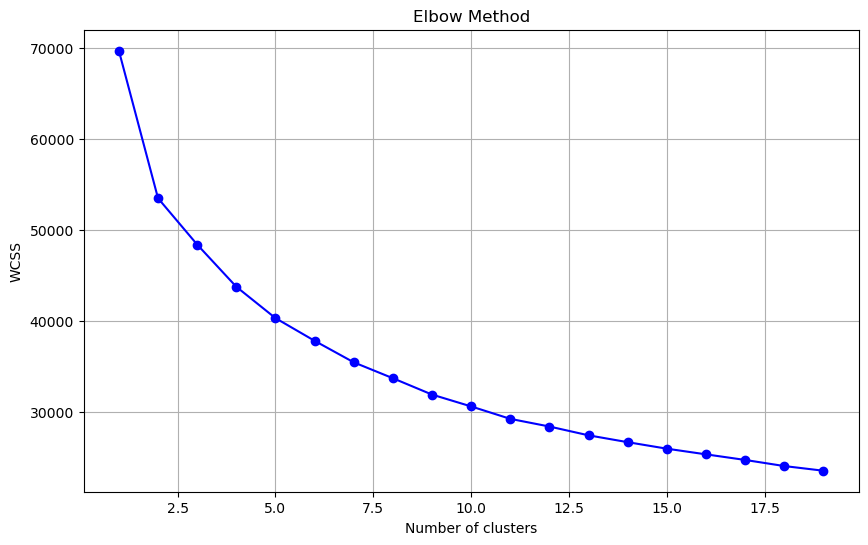

In [119]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [120]:
#################################################################################

In [121]:
# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=21,init='k-means++')  # Initialize K-means with 5 clusters
kmeans.fit(scaled_data)  # Fit the model to the scaled data

KMeans(n_clusters=5, random_state=21)

In [122]:
#################################################################################

In [123]:
X = df

In [124]:
#################################################################################

In [125]:
# Step 3: Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

In [126]:
#################################################################################

In [127]:
# Display the clusters
df[['Cluster']].head()

,Cluster
0,2
1,0
2,0
3,1
4,3


In [128]:
#################################################################################

In [129]:
df['Cluster'].value_counts()

Cluster
2    2834
0    2092
1    1066
4     932
3     818
Name: count, dtype: int64

In [130]:
#################################################################################

In [131]:
df

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number,Cluster
0,Korloff Cuir Mythique EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760251870322_-_korloff_-_korloff_cuir_mythique_edp_100_ml_-_100_ml_-_fd.png,1116.0,Korloff,3,Perfume,6,27,...,"[Mandarin, Pine, Juniper, Ginger, Galbanum, Iris, Leather]",NaN,NaN,NaN,NaN,7,3,3,1,2
1,Calvin Klein Euphoria Women,"<h4 data-v-de649438="""">4.8</h4>","<span data-v-de649438="""">500 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/c/a/calvin_klein_euphoria_eau_de_parfum_1.jpg,298.0,Calvin Klein,4,Perfume,8,20,...,"[Pomegranate, Lotus Blossom, Black Orchid, Amber, Wood]",NaN,NaN,NaN,NaN,5,1,2,2,0
2,Grasse Perfumes Oud The Palace EDP - 30 ml,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/9/4/94616-grasse-perfume-oud-the-palace-30-ml.png,159.0,Grasse Perfumes,3,Perfume,6,27,...,"[Rose Oil, Bulgarian Rose, Cinnamon, Leather, Sandalwood]",NaN,NaN,NaN,NaN,5,2,1,2,0
3,Marco Serussi Harmony,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760168632174_marco_serussi_harmoni_edt_100_ml_1.jpg,333.0,Marco Serussi,2,Perfume,5,36,...,"[Black Pepper, Cardamom, Cumin, Nutmeg, Neroli, Melon, Patchouli, Vetiver]",NaN,NaN,NaN,NaN,8,3,3,2,1
4,Lorenzo Villoresi Uomo,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/g/o/golden_scent_perfume_lorenzo_villoresi_perfumes_uomo_for_unisex_eau_de_toilette_8028544100934.jpg,629.0,Lorenzo Villoresi Firenze,2,Perfume,8,4,...,"[Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin, Neroli, Sage, Juniper, Clove, Pepper, Thyme, Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood]","Blue,Silver",NaN,NaN,NaN,21,8,6,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,Orientica Luxury Collection Oud Saffron EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6291106811520-orientica-orientica-luxury-collection-oud-saffron-_u_-edp-80-ml.png,474.0,Orientica,3,Perfume,13,35,...,"[Vanilla, Saffron, Patchouli, Musk, Guaiac Wood, Agarwood]",NaN,NaN,NaN,NaN,6,1,2,3,2
7738,Salvatore Ferragamo Tuscan Soul Convio,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/8/0/8034097955365_salvatore_ferragamo_tuscan_soul_convivio_edt_75_ml.jpg,754.0,Salvatore Ferragamo,3,Perfume,13,8,...,"[carrot seeds, grapefruit, jasmine, cypress trees, Cashmere wood and amberoxan.]",Multi,NaN,NaN,NaN,5,2,2,2,4
7739,Montale Day Dreams,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/g/o/golden_scent_perfume_montale_perfumes_day_dreams_for_unsex_eau_de_perfum_m0060211b.jpg,426.0,Montale,3,Perfume,8,10,...,"[Mandarin Orange, Orange Blossom, Neroli, Tiare Flower, Jasmine, Sandalwood, Vanilla, Coconut.]","Blue,Gold",NaN,NaN,NaN,8,3,3,2,2
7740,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/0/3015285282093-shakespeare-perfume-shakespeare-lover_s-complain-edp-spray-100ml.png,569.0,Shakespeare Perfume,3,Perfume,8,4,...,"[Berry, Tonka Bean, Leather, Amber]",NaN,NaN,NaN,NaN,4,0,0,0,0


In [132]:
#################################################################################

In [133]:
# Apply K-means clustering to scaled data
kmeans = KMeans(n_clusters=5, random_state=21)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=21)

In [134]:
#################################################################################

In [135]:
# Predict cluster labels
cluster_labels = kmeans.labels_

In [136]:
#################################################################################

In [137]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

In [138]:
#################################################################################

In [139]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.17794699375206993


In [140]:
#################################################################################

In [141]:
df[df['Cluster'] == 0]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number,Cluster
1,Calvin Klein Euphoria Women,"<h4 data-v-de649438="""">4.8</h4>","<span data-v-de649438="""">500 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/c/a/calvin_klein_euphoria_eau_de_parfum_1.jpg,298.0,Calvin Klein,4,Perfume,8,20,...,"[Pomegranate, Lotus Blossom, Black Orchid, Amber, Wood]",NaN,NaN,NaN,NaN,5,1,2,2,0
2,Grasse Perfumes Oud The Palace EDP - 30 ml,"<h4 data-v-de649438="""">4.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/9/4/94616-grasse-perfume-oud-the-palace-30-ml.png,159.0,Grasse Perfumes,3,Perfume,6,27,...,"[Rose Oil, Bulgarian Rose, Cinnamon, Leather, Sandalwood]",NaN,NaN,NaN,NaN,5,2,1,2,0
7,Khaltat Salang,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6291103883001-khaltat-blends-of-love-salang-edp-65-ml-1.jpg,575.0,Khaltat,3,Perfume,10,30,...,"[Rose, Patchouli, Oud]",NaN,NaN,NaN,NaN,3,1,1,1,0
14,La Défense Perfume No.4 EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6285897009624_-_la_d_fense_perfume_-_no.4_-_50_ml_-_fd.png,230.0,La Défense Perfume,3,Perfume,10,31,...,"[Oud, Amber, Sandalwood, Musk]",NaN,NaN,NaN,NaN,4,1,1,2,0
19,Jad Khaoukh Peach Rivers of China EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6281184005935-jad-jad-khaoukh-peach-rivers-of-china-edp.png,249.0,Jad,3,Perfume,8,20,...,[Peach],NaN,NaN,NaN,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728,Perfume Legend Tfasil EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/1/0/10220366_-_perfume_legend_-_-_80ml.png,285.0,Perfume Legend,3,Perfume,15,10,...,"[Gardenia, Musk, Powder, Flowers]",NaN,NaN,NaN,NaN,4,0,0,0,0
7730,Banafa For Oud Black Rose EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/0/0/0033020148-1-banafa-for-oud-_-_-_-_-01.png,32.0,Banafa For Oud,4,Perfume,12,11,...,"[Lotus, Rose]",NaN,NaN,NaN,NaN,2,0,0,0,0
7734,Minis Memories Bali EDP - 30 ml,"<h4 data-v-de649438="""">4.8</h4>","<span data-v-de649438="""">71 Ratings</span>",//assets.goldenscent.com/catalog/product/m/e/memories_bali_bottle.jpg,59.0,Minis,4,Perfume,12,11,...,"[Freesia, Musks, Vetiver]",NaN,NaN,NaN,NaN,3,1,1,1,0
7740,Shakespeare Lover's Complain EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/3/0/3015285282093-shakespeare-perfume-shakespeare-lover_s-complain-edp-spray-100ml.png,569.0,Shakespeare Perfume,3,Perfume,8,4,...,"[Berry, Tonka Bean, Leather, Amber]",NaN,NaN,NaN,NaN,4,0,0,0,0


In [142]:
#################################################################################

In [143]:
df[df['Cluster'] == 1]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number,Cluster
3,Marco Serussi Harmony,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760168632174_marco_serussi_harmoni_edt_100_ml_1.jpg,333.0,Marco Serussi,2,Perfume,5,36,...,"[Black Pepper, Cardamom, Cumin, Nutmeg, Neroli, Melon, Patchouli, Vetiver]",NaN,NaN,NaN,NaN,8,3,3,2,1
5,Tory Burch Tory Burch,"<h4 data-v-de649438="""">4.7</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/g/o/golden_scent_perfume_tory_burch_perfumes_eau_de_parfum_for_women_eau_de_perfum_22548295700.jpg,553.0,Tory Burch,2,Perfume,14,10,...,"[Neroli, Grapefruit, Cassis, Bergamot, Peony, Tuberose, Jasmine Sambac, Vetiver, Sandalwood.]","Gold,Pink",NaN,NaN,NaN,9,3,3,3,1
6,Epock Genar EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6281000756102_-_epock_-_epock_genar_for_men_eau_de_parfum_50ml_-_50_ml_-_fd_1_.png,185.0,Epock,2,Perfume,5,30,...,"[Lemon, Ginger, Grapefruit, Sweet Pineapple, Cardamom, Cinnamon, Vetiver, Labdanum, Oakmoss]",NaN,NaN,NaN,NaN,9,3,3,3,1
15,Saint Hilaire Private Red EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760004322443-saint-hilaire-saint-hilaire-private-red-pour-homme-_m_-edp-100-ml.png,138.0,Saint Hilaire,2,Perfume,8,20,...,"[Lemon, Green Apple, Sea Notes, Amber, Vetiver, Tonka Bean.]",NaN,NaN,NaN,NaN,6,1,1,3,1
18,Salvatore Ferragamo Uomo Casual Life,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/g/o/golden_scent_perfume_salvatore_ferragamo_uomo_casual_life_eau_de_toilette_for_men_100_ml_1.png,384.0,Salvatore Ferragamo,2,Perfume,5,4,...,"[Violet Leaves, Lemon, Cardanom, Coffee, Geranium, Ambrox, Cashmere Wood, White Cedarwood, White Musk]",Silver,NaN,NaN,NaN,9,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Batalat Deep EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6286592134679-batalat-_-_.png,235.0,Batalat,2,Perfume,13,35,...,"[Bergamot, Cardamom, Buddha's Hand Plant, White Cedar, Violet, Patchouli, Amber woods, Leather, Amber]",NaN,NaN,NaN,NaN,9,3,3,3,1
7716,Jaguar Pace Accelerate,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/7/6/7640171190877-jaguar-jaguar-pace-accelerate-_m_-edt-100-ml-1.jpg,130.0,Jaguar,2,Perfume,7,8,...,"[Bergamot, Mandarin, Cardamom, Coriander, Juniper Berry, Nutmeg, White Pepper, Jasmine, Lily-of-the-valley, Vetiver, Musk.]",NaN,NaN,NaN,NaN,11,3,6,2,1
7726,Jacadi Toute Petite EDS,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/7/6/7613107400241_-_jacadi_-_toute_petite_-_eau_de_senteur_alcohol_free_100ml_-_100_ml_-_fd.png,281.0,Jacadi,1,Perfume,7,8,...,"[Bergamot, Grapefruit, Freesia, Orange Blossom, Lily of the Valley, Musk, Sandalwood, Cedar]",NaN,NaN,NaN,NaN,8,2,3,3,1
7732,Gingle Gilent EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">6 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6281123116166-deraah-gilent-100-ml.png,160.0,Deraah,2,Perfume,7,33,...,"[Grapefruit, Marine Notes, Jasmine, Saffron, Musk, Amber, Incense, Leather, Moss, Patchouli]",NaN,NaN,NaN,NaN,10,2,2,6,1


In [144]:
#################################################################################

In [145]:
df[df['Cluster'] == 2]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number,Cluster
0,Korloff Cuir Mythique EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3760251870322_-_korloff_-_korloff_cuir_mythique_edp_100_ml_-_100_ml_-_fd.png,1116.0,Korloff,3,Perfume,6,27,...,"[Mandarin, Pine, Juniper, Ginger, Galbanum, Iris, Leather]",NaN,NaN,NaN,NaN,7,3,3,1,2
8,Atelier Cologne Clementine California EDC,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/7/3700591230035_-_atelier_cologne_-_atelier_cologne_clementine_california_cologne_absolue_pure_perfume_unisex_eau_de_cologne_100ml_-_100_ml_-_fd.png,890.0,Atelier Cologne,3,Perfume,7,8,...,"[Juniper Berry, Mandarin, Clementine, Pepper, Star Anise, Basil, Sandalwood, Vetiver, Cypress]",NaN,NaN,NaN,NaN,9,3,3,3,2
9,Guerlain Patchouli Paris EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/3/3346470148819_-_guerlain_-_guerlain_patchouli_paris_eau_de_parfum_100ml_-_100_ml_-_fd.png,2046.0,Guerlain,3,Perfume,13,35,...,"[Aldehydes, Iris, Vanilla, Amber, Patchouli]",NaN,NaN,NaN,NaN,5,1,1,3,2
12,Boadicea The Victorious Fortitude EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/5/0/5060475232516_-_boadicea_-boadicea_the_victorious_fortitude_women_s_eau_de_parfum_100ml-fd.png,1650.0,Boadicea,4,Perfume,15,10,...,"[Black Currant, Bergamot, Lily, Ylang-ylang, Jasmine, Gardenia, Woods]",NaN,NaN,NaN,NaN,7,3,3,1,2
13,Guru Egos EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/7/3700796900665-guru-guru-egos-_u_-edp-100-ml_1_.png,579.0,Guru,3,Perfume,8,20,...,"[Fruity Notes, Ylang-ylang, Jasmine, Amber, Musk, Patchouli]",NaN,NaN,NaN,NaN,6,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,IMAA N1 EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/1/0/1001_-_imaa_-_imaa_n1_edp_-_75_ml_-_fd_n_.png,219.0,IMAA,3,Perfume,5,11,...,"[Pink Pepper, Bergamot, Patchouli, Cherry, Tonka Bean, Oakmoss, White Amber]",NaN,NaN,NaN,NaN,7,3,1,3,2
7733,Guerlain Néroli Plein Sud EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/2/1/21gs100884-guerlain-ne_roli-plein-sud-_-eau-de-parfum-100ml.png,2046.0,Guerlain,3,Perfume,5,30,...,"[Cinnamon, Turmeric, Ginger, Tunisian Orange Flowers, Neroli, Sandalwood, Vetiver]",NaN,NaN,NaN,NaN,7,3,2,2,2
7736,Prada Les Infusions De Mimosa EDP,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/8/4/8435137753307-prada-prada-les-infusions-de-mimosa-_w_-edp-100-ml.png,679.0,Prada,4,Perfume,15,10,...,"[Anise, Tangerine, Mimosa, Rose, Woody Notes]",NaN,NaN,NaN,NaN,5,2,2,1,2
7737,Orientica Luxury Collection Oud Saffron EDP,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6291106811520-orientica-orientica-luxury-collection-oud-saffron-_u_-edp-80-ml.png,474.0,Orientica,3,Perfume,13,35,...,"[Vanilla, Saffron, Patchouli, Musk, Guaiac Wood, Agarwood]",NaN,NaN,NaN,NaN,6,1,2,3,2


In [146]:
#################################################################################

In [147]:
df[df['Cluster'] == 3]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number,Cluster
4,Lorenzo Villoresi Uomo,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">2 Ratings</span>",//assets.goldenscent.com/catalog/product/g/o/golden_scent_perfume_lorenzo_villoresi_perfumes_uomo_for_unisex_eau_de_toilette_8028544100934.jpg,629.0,Lorenzo Villoresi Firenze,2,Perfume,8,4,...,"[Bergamot, Petitgrain, Laurel, Lemon, Orange, Coriander, Lavender, Elemi resin, Neroli, Sage, Juniper, Clove, Pepper, Thyme, Oakmoss, Musk, Patchouli, Rosemary, Sandalwood, Vetiver, Cedarwood]","Blue,Silver",NaN,NaN,NaN,21,8,6,7,3
11,Creed Absolu Aventus EDP - 75 ml,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/5/3508440251749-creed-creed-absolu-aventus-for-men-eau-de_parfum_75ml.png,1987.0,Creed,2,Perfume,7,8,...,"[Black Currant, Bergamot, Grapefruit, Cardamom, Citron, Cinnamon, Ginger, Vetiver, Patchouli, Pink Pepper]",NaN,NaN,NaN,NaN,10,3,4,3,3
35,Chanel N° 19,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">4 Ratings</span>",//assets.goldenscent.com/catalog/product/3/1/3145891194708-chanel-no.19-_l_-edt-100-ml-1.jpg,699.0,Chanel,4,Perfume,14,10,...,"[Green Notes, Bergamot, Neroli, Ylang-Ylang, Lily-of-the-Valley, Rose, Narcissus, Iris, Leather, Oak Moss, Sandalwood, Vetiver]",NaN,NaN,NaN,NaN,12,3,5,4,3
42,Floris London Chypress EDT,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/8/8/886266591144-floris-london-floris-london-chypress---100-ml.png,899.0,Floris London,3,Perfume,14,10,...,"[Neroli, Bergamot, Lemon, Sweet Orange, Jasmine, Ylang-ylang, Rose, Osmanthus, Vanilla, Musk, Patchouli, Amber]",NaN,NaN,NaN,NaN,12,5,3,4,3
49,Karl Lagerfeld Classic,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">3 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/g/o/golden_scent_perfume_karl_lagerfeld_perfumes_lagerfeld_classic_for_men_eau_de_toilette.jpg,282.0,Karl Lagerfeld,2,Perfume,16,36,...,"[Aldehydes, herbal scents, tarragon, sage, bergamot, lemon, sandalwood, patchouli, iris, jasmine, cedar, tobacco, rose, amber, tonka, musk, vanilla, oak]",Orange,NaN,NaN,NaN,18,6,7,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,Eisenberg Secret I Palissandre Noir,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/2/3259551007687_eisenberg_secret_i_palissandre_noir_edp_100ml_1.jpg,518.0,Eisenberg,2,Perfume,16,36,...,"[bergamot, mandarin orange, orange blossom, rose, wormwood, pepper, saffron, palisander rosewood, patchouli, cedar, sandalwood, labdanum, musk, vanilla.]",NaN,NaN,NaN,NaN,14,7,3,4,3
7707,Givenchy Xeryus,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/3/2/3274870002168-givenchy-givenchy-xeryus-_m_-edt-100-ml-1c.jpg,313.0,Givenchy,2,Perfume,10,4,...,"[lavender, green notes, mandarin orange, violet, jasmine, nutmeg flower, ylang-ylang, lily-of-the-valley, bergamot, rose, lemon, cyclamen, coriander, carnation, cypress, sandalwood, juniper berries, cinnamon, tarragon, petitgrain, geranium, Leather, amber, ]",NaN,NaN,NaN,NaN,24,11,10,8,3
7711,Van Cleef & Arpels First EDT,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">5 Ratings</span>",//assets.goldenscent.com/catalog/product/3/3/3386460004978-van-cleef-_-arpels-first-edt-for-women-100m.png,217.0,Van Cleef & Arpels,4,Perfume,14,10,...,"[Carnation, Tuberose, Orchid, Orris, Jasmine, Hiacynth, Rose, Ylang-Ylang, Lily-of-the-Valley, Narcissus, Romantic, ]",

In [148]:
#################################################################################

In [149]:
df[df['Cluster'] == 4]

,Name,rating,total_ratings,img,Price,Brand,Gender,Product Type,Character,Fragrance Family,...,Ingredients,Product Color,Preferences,Makeup Type,Search Key,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number,Cluster
10,Bvlgari Omnia Golden Citrine EDT,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/7/8/783320410888-bvlgari-bvlgari-omnia-golden-citrine-_w_-edt-65-ml.png,492.0,Bvlgari,4,Perfume,15,10,...,"[Sicilian mandarin, white peach, jasmine, ylang-ylang, Cedar, Benzoin]",NaN,NaN,NaN,NaN,6,2,2,2,4
22,Shakira I Am Rock EDT,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/8/4/8411061851081-shakira-shakira-i-am-rock_-_w_-edt-50-ml.png,141.0,Shakira,4,Perfume,15,10,...,"[Black Pepper, Bergamot, Green Apple, Freesia, Jasmine, Jasmine Sambac, Patchouli, Woody Notes, Vanilla]",NaN,NaN,NaN,NaN,9,3,3,3,4
33,Elizabeth Arden White Tea Mandarin Blossom,"<h4 data-v-de649438="""">3.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/8/5/85805574024-elizabeth-arden-white-tea-mandarin-blossom-eau-de-toilette-spray-1.jpg,231.0,Elizabeth Arden,4,Perfume,16,36,...,"[Mandarin, Bergamot, Lemon, Exotic Fruits, Orange Flower, Jasmine, Neroli, White Tea, Luminous Musks, Cedarwood, Osmanthus, Ambrox]",NaN,NaN,NaN,NaN,12,4,4,4,4
36,Oud Asalah Amber Giovanni Parfum,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/6/2/6287040475645_-_oud_asalah_-_-_50_ml_-_fd.png,345.0,Oud Asalah,3,Perfume,5,30,...,"[Amber, Sandalwood, Cardamom]",NaN,NaN,NaN,NaN,3,0,0,0,4
48,Al Qasim Oud Campi Parfum,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6283333555551_-_al_qasim_oud_-_campi_-_100_ml.png,239.0,Al Qasim Oud,3,Perfume,5,30,...,"[Cardamom, Cinnamon, Saffron, Tonka Bean, Tobacco, Vanilla, Patchouli]",NaN,NaN,NaN,NaN,7,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,Narciso Rodriguez For Her EDT,"<h4 data-v-de649438="""">4.9</h4>","<span data-v-de649438="""">500 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/n/a/narciso_rodriguez_for_her_eau_de_toilette_2.jpg,475.0,Narciso Rodriguez,4,Perfume,9,10,...,"[Honey Flower, Orange Blossom, Osmanthus, Amber, Vanilla, Musk, Wood, Vetiver]",NaN,NaN,NaN,NaN,8,2,4,2,4
7691,Equal Parisi Parfum,"<h4 data-v-de649438="""">0</h4>","<span data-v-de649438="""">0 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/6/2/6285535006923-_-_---parisi.png,111.0,Equal,2,Perfume,0,0,...,[البرغموت، التفاح الأخضر، زنبق الوادي، البرغموت، التفاح الأخضر، الفانيليا، حبوب التونكا، المسك، العنبر],NaN,NaN,NaN,NaN,1,0,0,0,4
7695,Pink Sugar Pink Sugar,"<h4 data-v-de649438="""">4.6</h4>","<span data-v-de649438="""">19 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/g/o/golden_scent_perfume_pink_sugar_perfumes_pink_sugar_for_women_eau_de_toilette.jpg,100.0,Pink Sugar,4,Perfume,13,8,...,"[Citrus, Neroli Crème Brule, Coconut Sandalwood, Musk, Creamy Accord.]","White,Pink",NaN,NaN,NaN,5,2,2,3,4
7710,Boucheron Boucheron,"<h4 data-v-de649438="""">5.0</h4>","<span data-v-de649438="""">1 Ratings</span>",//assets.goldenscent.com/catalog/product/cache/1/small_image/750x750/9df78eab33525d08d6e5fb8d27136e95/3/3/3386460036757-boucheron-boucheron-_l_-edt-100-ml.jpg,252.0,Boucheron,4,Perfume,12,11,...,"[Basil, Bergamot, Orange blossom, Lemon, Geranium, Iris, Sandalwood, Tuberose, Benz

In [150]:
#################################################################################

<Axes: xlabel='Ingredients Number', ylabel='Gender'>

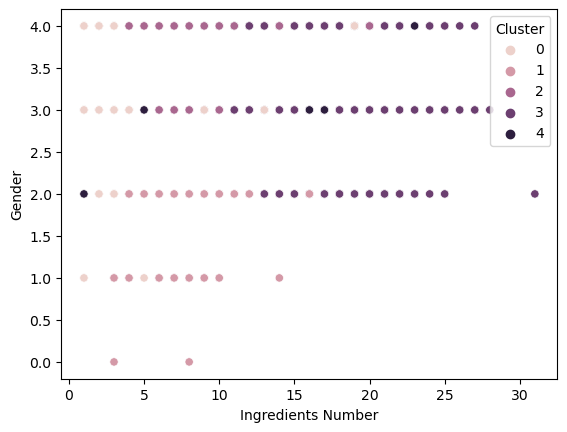

In [151]:
sns.scatterplot(data = df, x = 'Ingredients Number', y = 'Gender', hue = 'Cluster')

In [152]:
#################################################################################

In [153]:
# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(yahooo)

In [154]:
#################################################################################

In [155]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 3

In [156]:
#################################################################################

In [157]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [158]:
#################################################################################

In [159]:
#indices
distances[:,min_samples-1]

array([0.60010128, 0.29834146, 0.34432102, ..., 0.54519353, 0.24501409,
       0.1201375 ])

In [160]:
#################################################################################

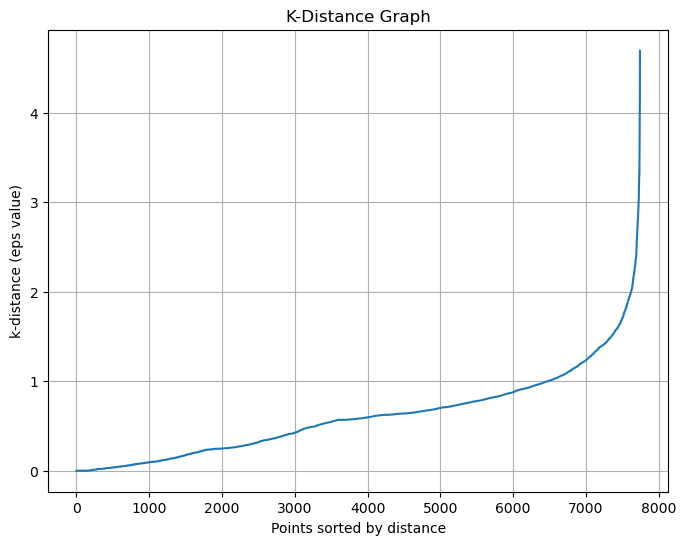

In [161]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [162]:
#################################################################################

In [358]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 0.8  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [360]:
#################################################################################

In [362]:
# Fit the model on the training data
clusters = dbscan.fit_predict(X_scaled)
pd.Series(clusters).value_counts()

 0      1842
-1      1783
 1      1263
 8       756
 4       301
        ... 
 86        3
 87        3
 89        3
 113       3
 110       3
Name: count, Length: 118, dtype: int64

In [363]:
#################################################################################

In [365]:
silhouette_avg = silhouette_score(yahooo, clusters)
silhouette_avg

-0.8572065747512219

In [367]:
#################################################################################

In [368]:
yahooo.head(2)

,Price,Gender,Character,Fragrance Family,Concentration,Ingredients Number,Top Notes Number,Middle Notes Number,Base Notes Number
0,1116.0,3,6,27,3,7,3,3,1
1,298.0,4,8,20,3,5,1,2,2


In [369]:
#################################################################################

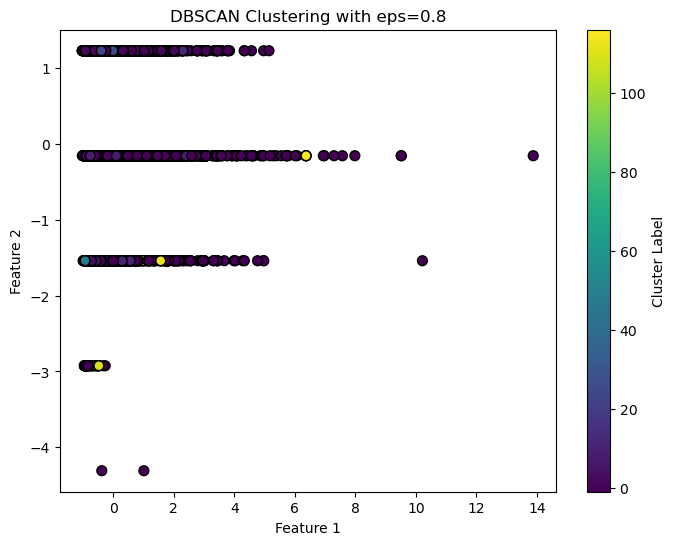

In [374]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [375]:
#################################################################################

In [378]:
X['dbscan'] = clusters

In [380]:
#################################################################################

In [382]:
X['dbscan'].value_counts()

dbscan
 0      1842
-1      1783
 1      1263
 8       756
 4       301
        ... 
 86        3
 87        3
 89        3
 113       3
 110       3
Name: count, Length: 118, dtype: int64

In [384]:
#################################################################################

<Axes: xlabel='Gender', ylabel='Ingredients Number'>

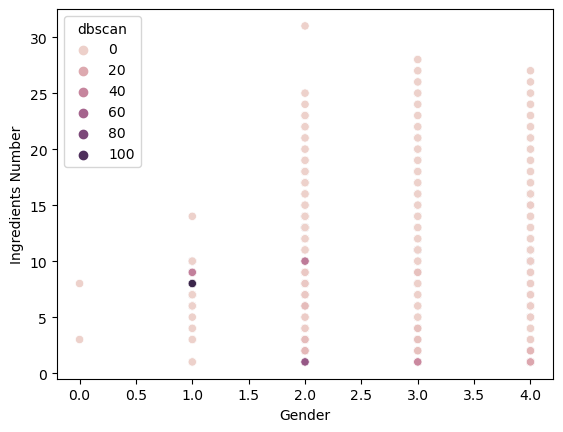

In [386]:
sns.scatterplot(data = X , x = 'Gender', y = 'Ingredients Number', hue = 'dbscan')

In [387]:
#################################################################################